# Sales Data Analysis (Mini Project)

Goal: Analyze sales data to find top cities, categories, products, and overall profitability.


## Data Cleaning
Checking for missing values and duplicate records.


In [9]:
from pathlib import Path
import pandas as pd

BASE_DIR = Path(r"C:\Users\Dunhi\Desktop\python\Data Analysis")
df = pd.read_csv(BASE_DIR / "sales.csv")


In [13]:
# Missing values
df.isnull().sum()


OrderID     0
Date        0
City        0
Category    0
Product     0
Sales       0
Quantity    0
Profit      0
dtype: int64

In [14]:
# Remove duplicates
df = df.drop_duplicates()

# Check shape after cleaning
df.shape


(10, 8)

## Profit Margin by City


In [10]:
city_summary = (
    df.groupby("City")[["Sales", "Profit"]]
      .sum()
      .sort_values("Sales", ascending=False)
)

city_summary["Profit_Margin_%"] = (city_summary["Profit"] / city_summary["Sales"]) * 100
city_summary


,Sales,Profit,Profit_Margin_%
City,,,
Dammam,5660,680,12.014134
Riyadh,5100,595,11.666667
Jeddah,1150,155,13.478261


In [11]:
city_summary.sort_values("Profit_Margin_%", ascending=False)


,Sales,Profit,Profit_Margin_%
City,,,
Jeddah,1150,155,13.478261
Dammam,5660,680,12.014134
Riyadh,5100,595,11.666667


## Sales by City Visualization


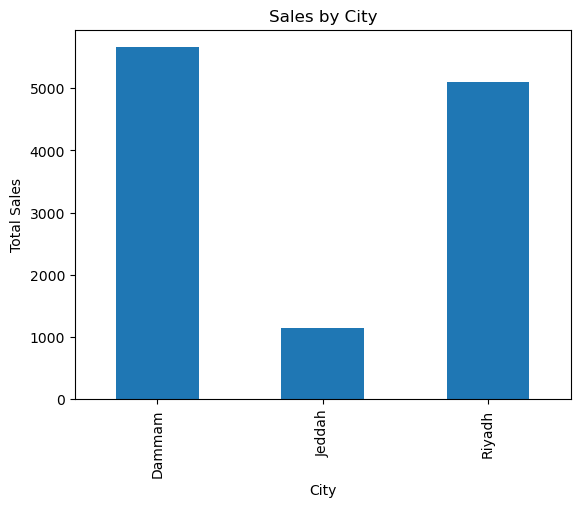

In [16]:
import matplotlib.pyplot as plt

city_sales = df.groupby("City")["Sales"].sum()
city_sales.plot(kind="bar")
plt.title("Sales by City")
plt.ylabel("Total Sales")
plt.show()


## Sales Trend Over Time


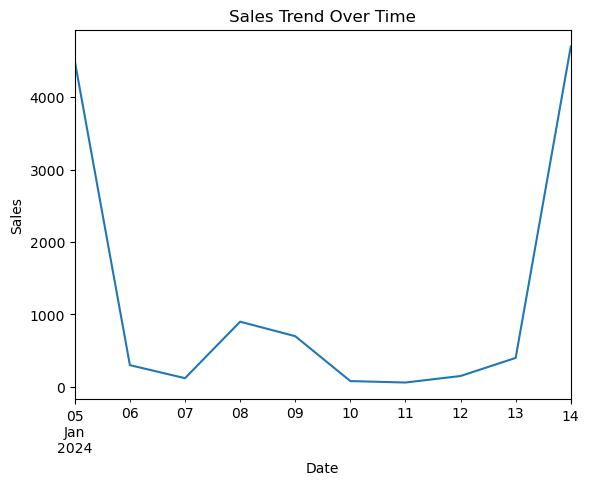

In [17]:
df["Date"] = pd.to_datetime(df["Date"])

daily_sales = df.groupby("Date")["Sales"].sum()
daily_sales.plot()
plt.title("Sales Trend Over Time")
plt.ylabel("Sales")
plt.show()


## Overall Performance


In [18]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
profit_margin = (total_profit / total_sales) * 100

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Profit Margin:", round(profit_margin, 2), "%")


Total Sales: 11910
Total Profit: 1430
Profit Margin: 12.01 %


## Key Insights

- Dammam generated the highest total sales and overall profit, making it the top-performing city in terms of revenue.
- Jeddah achieved the highest profit margin (~13%) despite having lower total sales, indicating more efficient profitability.
- The Technology category is the best-performing category, contributing the highest share of both sales and profit.
- Laptop is the top-performing product, generating the highest sales and profit among all products.
- Sales peaked on 2024-01-14 due to a high-value transaction.
- The business achieved total sales of 11,910 and total profit of 1,430, resulting in an overall profit margin of approximately 12%.
